## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [295]:
dataset = pd.read_csv("./bank-additional-full.csv", sep=';')

summary_stats = dataset.describe()
dataset_size = dataset.shape

print(f"Dataset size: {dataset_size}\n\nDataset stats:\n{summary_stats}")

Dataset size: (41188, 21)

Dataset stats:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [296]:
bank_target = dataset['y']
dataset['y'] = dataset['y'].map(lambda value: 1 if value == 'yes' else 0)
print(dataset['y'])

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [297]:
bank_client = dataset[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
print(f"Clients {bank_client}")

Clients        age          job  marital            education  default housing loan
0       56    housemaid  married             basic.4y       no      no   no
1       57     services  married          high.school  unknown      no   no
2       37     services  married          high.school       no     yes   no
3       40       admin.  married             basic.6y       no      no   no
4       56     services  married          high.school       no      no  yes
...    ...          ...      ...                  ...      ...     ...  ...
41183   73      retired  married  professional.course       no     yes   no
41184   46  blue-collar  married  professional.course       no      no   no
41185   56      retired  married    university.degree       no     yes   no
41186   44   technician  married  professional.course       no      no   no
41187   74      retired  married  professional.course       no     yes   no

[41188 rows x 7 columns]


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [298]:
max_age = dataset['age'].max()
min_age = dataset['age'].min()
print(f"Max Age is {max_age} and min is {min_age}")

Max Age is 98 and min is 17


In [299]:
missing_values_age = dataset['age'].isna().sum()

if missing_values_age > 0:
    print(f"There are {missing_values_age} missed values")
else:
    print("There are no missing values")

There are no missing values


Skew: 0.7846682380932289
kurtosis: 0.7910698035273853


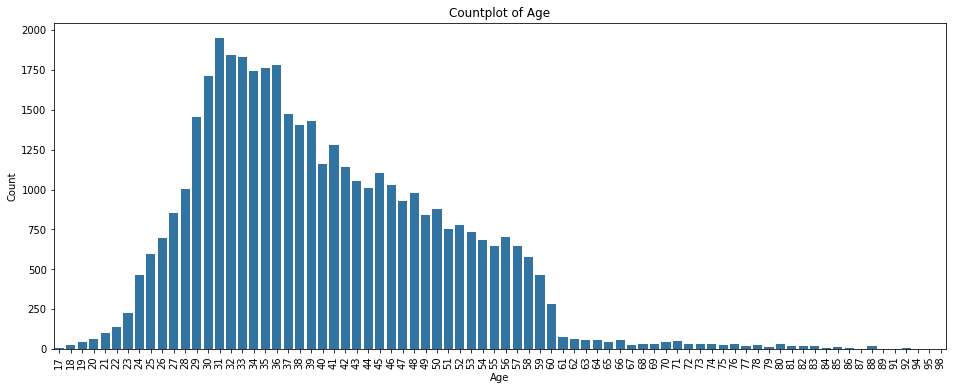

In [300]:
skewness = stats.skew(dataset['age'])
kurtosis = stats.kurtosis(dataset['age'], fisher=True)
print(f"Skew: {skewness}\nkurtosis: {kurtosis}");

plt.figure(figsize=(16, 6))
sns.countplot(x='age', data=dataset)
plt.title('Countplot of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

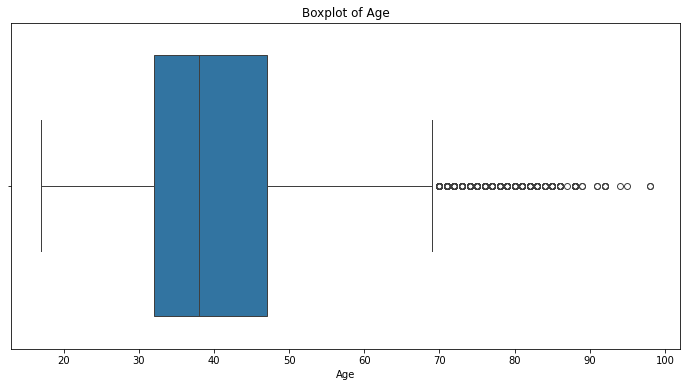

In [301]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', data=dataset)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

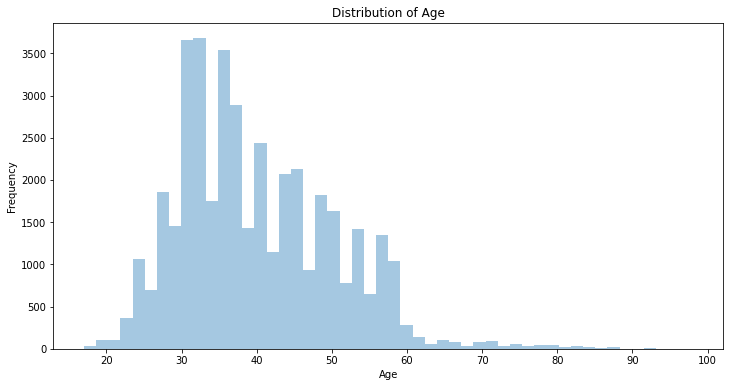

In [302]:
plt.figure(figsize=(12, 6))
sns.distplot(dataset['age'], kde=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Висновки з 1-4 завдання (детальні)**

1. Немає пропущених значень віку.
2. Розмірність датасету: (41188, 21)
3. У countplot віку важкий правий хвіст, що підтверджує значення skewness рівне 0.78.

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [303]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q2 = np.percentile(sorted_data, high_percentile-low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers

In [304]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1. По змінній age 469 аутлаєрів.
2. Половина клієнтів по віку входять в проміжок від 32 до 47.
3. Від 55 років клієнти займають 10% усього датасету.
4. До 27 років клієнти займають 10% усього датасету.

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

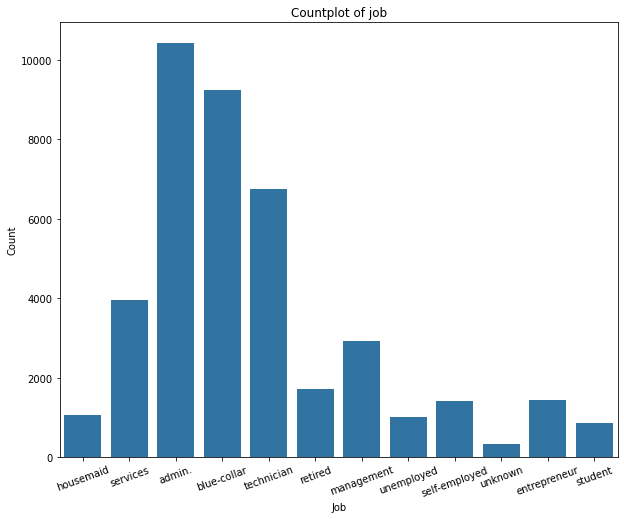

In [305]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataset, x='job')
plt.title('Countplot of job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

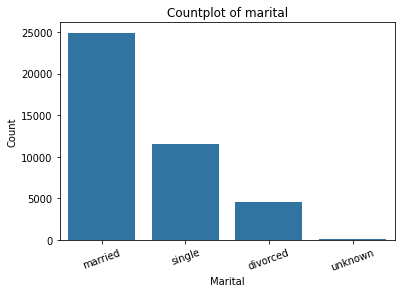

In [306]:
plt.figure(figsize=(6,4))
sns.countplot(data=dataset, x='marital')
plt.title('Countplot of marital')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

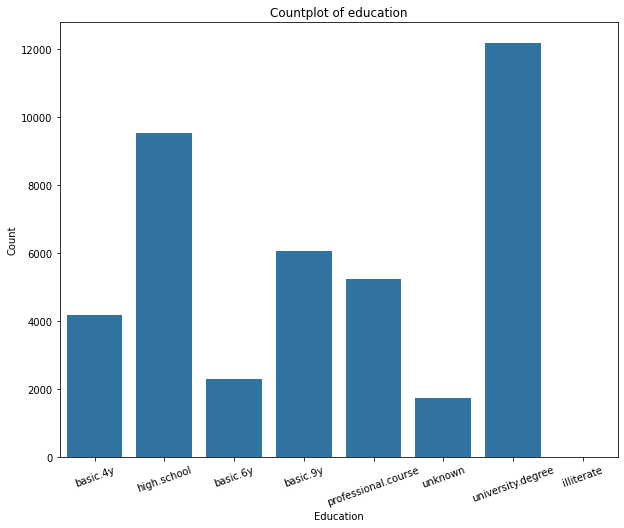

In [307]:
plt.figure(figsize=(10,8))
sns.countplot(data=dataset, x='education')
plt.title('Countplot of education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()

**Висновки з завдання 6 (детальні)**

1. Найпопулярніша робота серед клієнтів - admin.
2. Друга по популярності робота - blue-collar
3. Третя по популярності робота - technician
4. Клієнтів з невідомою роботою - найменше.
5. Із зазначеною роботою найменше клієнтів housemaid, unemployed, student.
6. marital по спаданню: married, single, divorced, unkown. Дивлячись на цей countplot можна побачити чітко виражену тенденцію, яка розкриває проблеми сьогоденного суспільства, та показує відсоток розлучення з людиною, якщо зареєструватись в банку. (я жартую)
7. Education: найбільше клієнтів з вищою освітою, найменше - без базовою освіти. Цікаво що з 4-річною освітою більше людей, ніж з 6-ти.

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

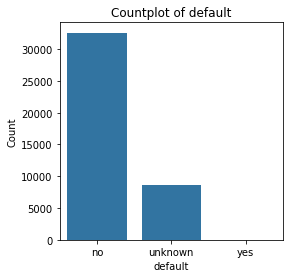

In [308]:
plt.figure(figsize=(4,4))
sns.countplot(data=dataset, x='default')
plt.title('Countplot of default')
plt.xlabel('default')
plt.ylabel('Count')
plt.show()

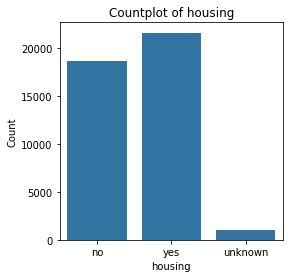

In [309]:
plt.figure(figsize=(4,4))
sns.countplot(data=dataset, x='housing')
plt.title('Countplot of housing')
plt.xlabel('housing')
plt.ylabel('Count')
plt.show()

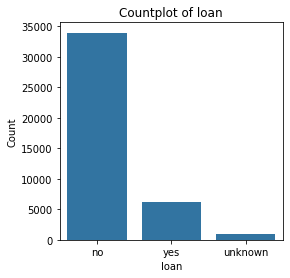

In [310]:
plt.figure(figsize=(4,4))
sns.countplot(data=dataset, x='loan')
plt.title('Countplot of loan')
plt.xlabel('loan')
plt.ylabel('Count')
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [311]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(dataset[col])
      
    return df

In [312]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])
dataset_copy = encode_categorical_columns(dataset, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [313]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
    """
    Function for encoding age column

    df: pd.DataFrame to encode
    age_col: age col to encode 
    """
    dataframe['age_quartile'] = pd.qcut(dataframe[age_col], 4, labels=False)
    dataframe['age_quartile_labels'] = pd.qcut(dataframe[age_col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    

    return dataframe

       age  job  marital  education  default  housing  loan  age_quartile  \
2       37    7        1          3        0        2     0             1   
14      35    1        1          1        0        2     0             1   
16      35    1        1          1        0        2     0             1   
24      37    0        1          3        0        2     0             1   
25      35    9        1          6        0        0     2             1   
...    ...  ...      ...        ...      ...      ...   ...           ...   
41171   33    8        1          5        0        2     0             1   
41175   34    8        2          7        0        2     0             1   
41176   38    3        0          3        0        2     2             1   
41180   36    0        1          6        0        0     0             1   
41181   37    0        1          6        0        2     0             1   

      age_quartile_labels  
2                      Q2  
14                 

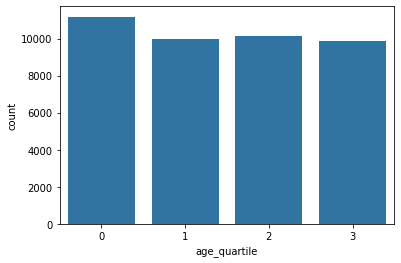

In [314]:
bank_client = encode_age(bank_client, 'age')
dataset = encode_age(dataset, 'age')

print(bank_client[bank_client['age_quartile'] == 1])

sns.countplot(bank_client, x='age_quartile')
plt.show()

**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних

Перетворення відбулось успішно.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [315]:
bank_relat = dataset[['contact', 'month', 'day_of_week', 'duration']]
for column in bank_relat:
    print(column, bank_relat[column].isna().sum())

contact 0
month 0
day_of_week 0
duration 0


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [316]:
search_for_unique_col = ['contact', 'month', 'day_of_week']
for col in search_for_unique_col:
    unique = bank_relat[col].unique()
    print(col, unique)

contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



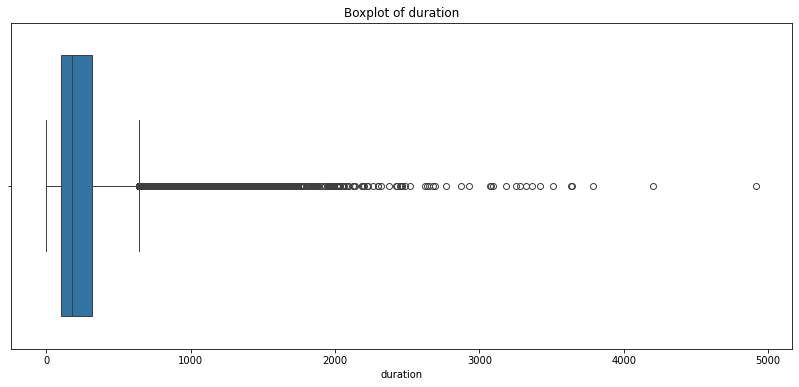

In [317]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='duration', data=dataset)
plt.title('Boxplot of duration')
plt.xlabel('duration')
plt.show()

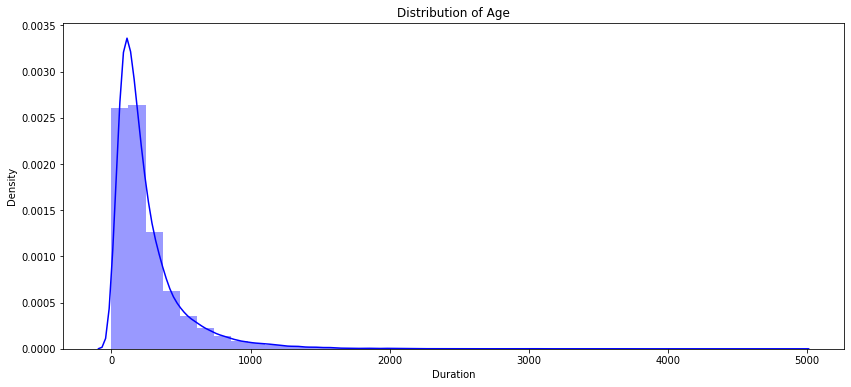

In [318]:
plt.figure(figsize=(14, 6))
sns.distplot(dataset['duration'], bins=40, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Duration')
plt.ylabel('Density')
plt.show()

In [319]:
kurtosis = stats.kurtosis(dataset['duration'], fisher=True)
skewness = stats.skew(dataset['duration'])

print(f"kurnosis: {kurtosis}\nskewness: {skewness}")

kurnosis: 20.245334438614844
skewness: 3.2630224157610432


1. Куртосис 20.24 вказує на те що в нас асиметрія, а саме - важкий правий хвіст.
2. Skewness 3.26 вказує на те що в нас важкий правий хвіст.
3. На боксплоті можна помітити що дуже велка кількість аутлаєрів. Це означає що значення більше близько 700 - рідкість.
4. На дисплоті добре помітно чому значення куртосису та асиметрії є такими, якими вони є.

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [320]:
transform_col = encode_categorical_columns(dataset, ['contact', 'month', 'day_of_week'])

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [321]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
    """
    Function for encoding duration column

    df: pd.DataFrame to encode
    duration_col: duration col to encode 
    """

    dataframe['duration_quartile'] = pd.qcut(dataframe[duration_col], 4, labels=False)
    dataframe['duration_quartile_labels'] = pd.qcut(dataframe[duration_col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

    return dataframe

In [322]:
bank_relat = encode_duration(bank_relat, 'duration')
dataset = encode_duration(dataset, 'duration')
print(bank_relat)

         contact month day_of_week  duration  duration_quartile  \
0      telephone   may         mon       261                  2   
1      telephone   may         mon       149                  1   
2      telephone   may         mon       226                  2   
3      telephone   may         mon       151                  1   
4      telephone   may         mon       307                  2   
...          ...   ...         ...       ...                ...   
41183   cellular   nov         fri       334                  3   
41184   cellular   nov         fri       383                  3   
41185   cellular   nov         fri       189                  2   
41186   cellular   nov         fri       442                  3   
41187   cellular   nov         fri       239                  2   

      duration_quartile_labels  
0                           Q3  
1                           Q2  
2                           Q3  
3                           Q2  
4                           Q3

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [323]:
bank_socec = dataset[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
print(bank_socec)

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0               1.1          93.994          -36.4      4.857       5191.0
1               1.1          93.994          -36.4      4.857       5191.0
2               1.1          93.994          -36.4      4.857       5191.0
3               1.1          93.994          -36.4      4.857       5191.0
4               1.1          93.994          -36.4      4.857       5191.0
...             ...             ...            ...        ...          ...
41183          -1.1          94.767          -50.8      1.028       4963.6
41184          -1.1          94.767          -50.8      1.028       4963.6
41185          -1.1          94.767          -50.8      1.028       4963.6
41186          -1.1          94.767          -50.8      1.028       4963.6
41187          -1.1          94.767          -50.8      1.028       4963.6

[41188 rows x 5 columns]


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [324]:
bank_other = dataset[['campaign', 'pdays', 'previous', 'poutcome']]

**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [325]:
transform_poutcome = encode_categorical_columns(dataset, ['poutcome'])
print(transform_poutcome)

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  ...  emp.var.rate  cons.price.i

## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [326]:
bank_final = dataset[['contact', 'month', 'day_of_week', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
print(bank_final)

       contact  month  day_of_week  age  job  marital  education  default  \
0            1      6            1   56    3        1          0        0   
1            1      6            1   57    7        1          3        1   
2            1      6            1   37    7        1          3        0   
3            1      6            1   40    0        1          1        0   
4            1      6            1   56    7        1          3        0   
...        ...    ...          ...  ...  ...      ...        ...      ...   
41183        0      7            0   73    5        1          5        0   
41184        0      7            0   46    1        1          5        0   
41185        0      7            0   56    5        1          6        0   
41186        0      7            0   44    9        1          5        0   
41187        0      7            0   74    5        1          5        0   

       housing  loan  campaign  pdays  previous  poutcome  emp.var.rate  \


**Завдання 19** Провести ділення вибірки

In [327]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state, shuffle = True)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [328]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, dataset['y'], 0.2, 10, 101)

In [329]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    return X_train, X_test

In [330]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [332]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7188   91]
 [ 754  205]]
90.0


## k-NN

k=1 85.05 (+/- 0.86)
k=2 89.07 (+/- 0.57)
k=3 88.48 (+/- 0.48)
k=4 89.48 (+/- 0.55)
k=5 89.37 (+/- 0.65)
k=6 89.67 (+/- 0.63)
k=7 89.68 (+/- 0.69)
k=8 89.78 (+/- 0.69)
k=9 89.77 (+/- 0.73)
k=10 89.83 (+/- 0.76)
k=11 89.80 (+/- 0.71)
k=12 89.95 (+/- 0.69)
k=13 89.84 (+/- 0.66)
k=14 89.94 (+/- 0.66)
k=15 89.89 (+/- 0.69)
k=16 89.93 (+/- 0.69)
k=17 89.91 (+/- 0.63)
k=18 89.92 (+/- 0.68)
k=19 89.88 (+/- 0.73)
k=20 89.92 (+/- 0.67)
k=21 89.90 (+/- 0.67)
k=22 89.90 (+/- 0.66)
k=23 89.95 (+/- 0.63)
k=24 89.93 (+/- 0.65)
k=25 89.94 (+/- 0.63)
The optimal number of neighbors is 22 with 90.0%


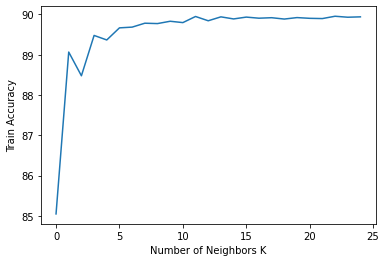

In [333]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [334]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7177  102]
 [ 751  208]]
90.0


## Логістична Регресія

In [341]:
models = pd.DataFrame({
                'Models': ['LOGCV', 'KNN'],
    'Score': [LOGCV, KNNCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
1,KNN,0.897551
0,LOGCV,0.897428


**Висновки по моделям (детальні)**

1. Обидві моделі досягнули відносно високого, схожого показника.
2. КНН злегка перевершив логістичну регресію.
3. 